<a href="https://colab.research.google.com/github/CiaraFarrellSETU/-SEM2---Data-Analytics-and-Algorithms/blob/main/K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is all about K-Nearest Neighbout (k-nn).  
This is supervised machine learnign algorithm used for classification.  
K-nn can be used to classify points based on the classes around the point and how many neighbours are being used in the classification.

In K-NN the following items can be changed.  
* The number of classes can change, but the number must always be an integer value.  
* The points can be classified based on the number of neighbours nearest to it.  
* When a k value is choosen by using the k-nn algorithm the points class will be selected. In general the bigger K value the better.  
* The k value must always be a odd integer value.   
* In the simple option is is possible to include a new point which can be classified.  
* The dataset can be changed.  
* The x and y values will be assigned based on what dataste is being used.  
* The y value is usally set the the variable than can be used for classification.  
* The training and test data size is changable depending on what split is needed to imporive the overall accuracy of the model. In part b 0.32:0.68 split gave the best confusion matrix and accuracy in comparison to a 0.25:0.75.  
* When using kneighbours classifier the number of neighbours can be changed but i left it at the default value of five to give enough neighbours around the point.  

**Part A**  
To begin with a simple method of classification is carried out by using 10 points.  
The points are split into two classes denoted by class 0 or 1.  
The points are then plotted below.  
I adapted this example to get a feel for k-nn  before moving to a harder use of the classification [ https://www.w3schools.com/python/python_ml_knn.asp ].  
I changed the points co-ordinates and classification

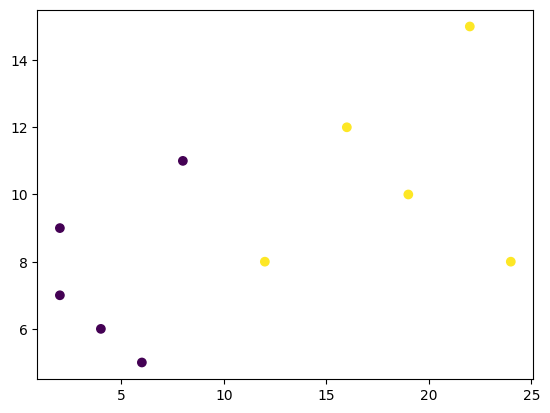

In [72]:
import matplotlib.pyplot as plt

x=[4,6,12,2,8,16,22,2,24,19]
y=[6,5,8,9,11,12,15,7,8,10]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.show()

The KNeighborsClassifier is imported.  
n-neighbours is the number of neighbours used in the kneighbours queries.  
The kKNeighborsClassifier is then fitted to the data and its corresponding classes.  
To begin with classification will happen with only the single nearest neighbour

In [73]:
from sklearn.neighbors import KNeighborsClassifier

data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data, classes)

KNeighborsClassifier(n_neighbors=1)

By creating a new point the classification model can be used to determine whether it belongs in class 0 or 1.  
The new points I generated has the co-ordinates of (10,12) and it plotted with the other predetermine points.  
By using the made prediction model it is classified as class 0.  

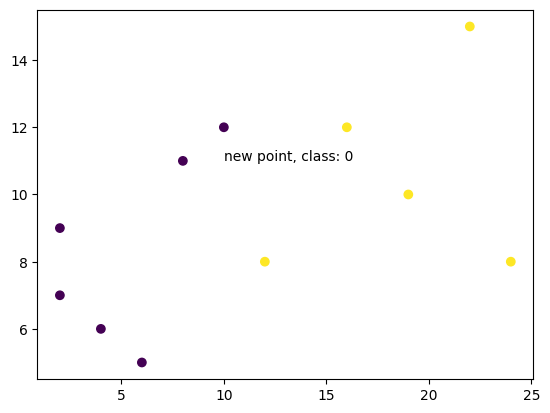

In [74]:
new_x = 10
new_y = 12
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-0, y=new_y-1, s=f"new point, class: {prediction[0]}")
plt.show()

Next i created a different new point to test the classification model to determine whether it belongs in class 0 or 1.  
The new point generated has the co-ordinates of (20,8) and it plotted with the other predetermine points.  
By using the made prediction model it is classified as class 1 as it is on the right side of the graph.  

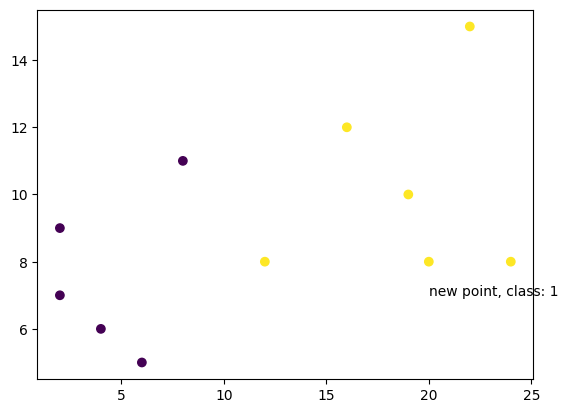

In [75]:
new_x = 20
new_y = 8
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-0, y=new_y-1, s=f"new point, class: {prediction[0]}")
plt.show()

What is important to note about the previous two examples only 1 nearest neighbour was used to classify the new point.  
But a different result may be obtained if a different number of neighbours is used.  
For example a new point (10,10) will be created.  
When using 3 neighbours for classfication the point is classified as a member of the class 1.

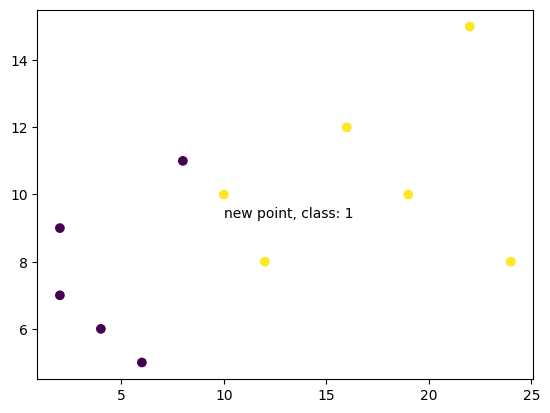

In [76]:
knn = KNeighborsClassifier(n_neighbors=3)

new_x = 10
new_y = 10
new_point = [(new_x, new_y)]

knn.fit(data, classes)

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-0, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

But when using 5 neighbours for classfication the point is classified as a member of the class 0.  
This is difference is because by using 5 neighbours the euclidean distance between class 0 is less than class 1 .  
Therefore putting the new point in the 0 class.


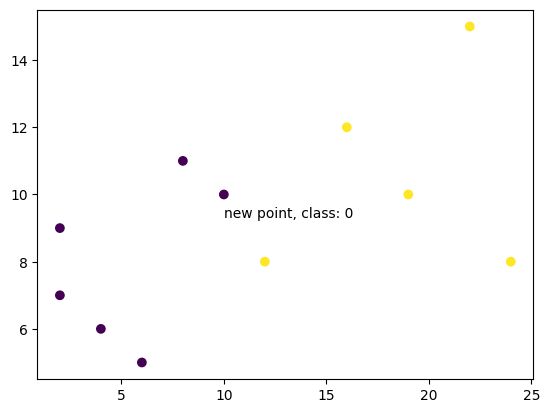

In [77]:
knn = KNeighborsClassifier(n_neighbors=5)

new_x = 10
new_y = 10
new_point = [(new_x, new_y)]

knn.fit(data, classes)

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-0, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

**Part B**  
Now k-nn will be used on a realword dataset.  
Palmers penguins is a dataset which contain the measures of different atribution features of three different ypes of penguins.

Importing the needed datasets

In [78]:
# Scikit-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.metrics import accuracy_score
# other libraries
import numpy as np
import pandas as pd

The penguin dataset is taken from kaggle.  
Read in as a csv datafram and the first five rows of the data are printed.

In [79]:
peng= 'https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
peng_df = pd.read_csv(peng)

peng_df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Setting the y variable to be the penguin species

In [80]:
y = peng_df.iloc[:,1].values


Setting the x values to be bill lenght, bill depth, flipper length and body mass


In [81]:
x = peng_df.iloc[:,3:7].values

importing the train test split model from sklearn.model_selection.  
This module is used to slpit data into random test and train subset for machince learning.

In [82]:
from sklearn.model_selection import train_test_split

Setting the train and test subsets.  
They are defined by x_train,x_test,y_train and y_test.  
The data is split so the test size is 25% of the overall data and the train set contains the remaining 75%

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

Next by importing the KNeighborsClassifier as assigning it to the variable name knn.  
It is assigned to a varaible name to make it easier when coding as knn is easier to type and has a leser chance of spelling mistakes occuring than typing KNeighborsClassifier.

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

When i attempted to perform a knn fit on the train data the error ValueError: Input X contains NaN occured.  
This occurs when the data may not be clean and contains missing or null values.  
So the penguins data will have to be checked for missing values and either remove then or set them to zero.

In [85]:
#knn.fit(x_train,y_train)

Finding what columns contain missing data and droping the missing values

ValueError: Input X contains NaN

In [86]:
peng_df.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [87]:
peng_df=peng_df.dropna()

Checking no missing values still remain.

In [88]:
peng_df.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

Resetting x and y values.

In [89]:
y = peng_df.iloc[:,1].values

In [90]:
x = peng_df.iloc[:,3:7].values

Setting the train and test subsets.  
They are defined by x_train,x_test,y_train and y_test.  
The data is split so the test size is 25% of the overall data and the train set contains the remaining 75%.  
The random state is kept at zero as increaseing this values dcereases the models overall accuracy.
The data split is left at 25% as values above or below it reduce the accuracy score

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=0)

Performing k-nn on the train data.

In [92]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

Using k-nn on the x_test data.  
This predicts the class lables for the data provided in the test dataset.

In [93]:
y_predict = knn.predict(x_test)

In [97]:
y_pred = knn.predict(x_train)

Checking the accuracy score of y_predict and y_test.  
Accuracy score is used to find to subsets accuracy so that the predicted lables match the the accurate lables in the y test.  
The found accuracy score is ~0.83

In [94]:
accuracy = accuracy_score(y_predict,y_test)
accuracy

0.8333333333333334

In [98]:
accuracy_score(y_pred,y_train)

0.8232931726907631

Creating the confusion matrix for the y test/prediction.  
A confusion matrix shows a summary of prediction in the form of a matrix.  
In a 3x3 confusion matrix the values along the diagonal starting from the top left to the bottom right are what is being observed.  
The prediction for the middle prediction value is bad as its false score is alrger than its true prediction.

Printing the confusion matrix as deccribed in the classification report Adelie and Gentoo have good classification and not many flase negatives or positives.  
While however the Chinstrap is not so good.  

In [95]:
from sklearn.metrics import classification_report,confusion_matrix
mat = confusion_matrix(y_test,y_predict)
mat

array([[39,  1,  2],
       [11,  4,  0],
       [ 0,  0, 27]])

In [99]:
confusion_matrix(y_train,y_pred)

array([[95,  4,  5],
       [27, 24,  2],
       [ 5,  1, 86]])

Printing the classification report for the trained model.  
The classification report code is from from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html.  
The classification report can be used to give a detailed view of how the model performs classification in each class.  
While for Adelie and Gentoo the classification precission rate is high.  
But however the Chinstrap only has a 0.27 recall which is only means the model is recieving a large number of false predictions

In [96]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      Adelie       0.78      0.93      0.85        42
   Chinstrap       0.80      0.27      0.40        15
      Gentoo       0.93      1.00      0.96        27

    accuracy                           0.83        84
   macro avg       0.84      0.73      0.74        84
weighted avg       0.83      0.83      0.81        84



Changes were made to both the train test data split and random state such as decreasing the test data size and increasing the random state and vice versa nothing seemed to change to model and give better paramaters.